# SME0822 Análise Multivariada e Aprendizado não-Supervisionado

Por Cibele Russo - ICMC USP

- Teste Shapiro-Wilk multivariado (usando rpy2)
- Teorema Limite Central - Ilustração em Python
- Um teste de hipóteses para ($\mu$ multidimensional)

$$\begin{array}{l}H_0:{\mu}=\mu_0\mbox{ contra }\\H_1:\mu\neq\mu_0,\end{array}$$





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean = [0, 0, 0]

cov = [[2,1,0],[1,3,1],[0,1,4]]  

x1, x2, x3 = np.random.multivariate_normal(mean, cov, 100).T

x4 = np.random.poisson(1, 100)

dados = np.array([x1,x2,x3,x4])

df = pd.DataFrame(data=dados.T)

In [3]:
# Outro exemplo que fizemos em aula
#mean = [0, 0, 0]
#cov = [[2,0,0],[0,3,0],[0,0,4]]  
#x1, x2, x3 = np.random.multivariate_normal(mean, cov, 100).T
#dados = np.array([x1,x2,x3])
#df = pd.DataFrame(data=dados.T)

In [4]:
df

,0,1,2,3
0,-0.188391,0.395739,-0.204521,0.0
1,0.889422,2.564291,-1.387221,2.0
2,2.053448,1.763366,0.755879,2.0
3,0.292054,-0.368361,-1.998243,0.0
4,3.035609,3.678618,0.135557,0.0
...,...,...,...,...
95,-1.918836,-0.141059,2.635111,0.0
96,0.728342,-0.141508,0.324204,1.0
97,-1.857758,0.874585,-0.974127,0.0
98,1.956303,1.823253,-0.317178,0.0


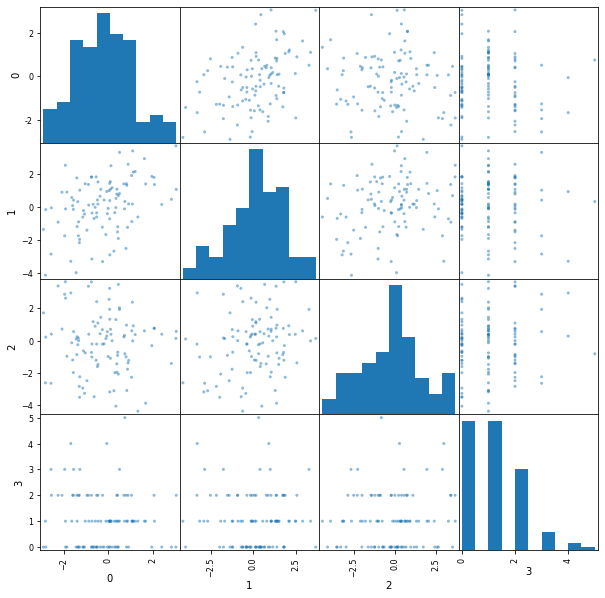

In [5]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.show()

Para fazer o **Teste de Shapiro Wilk Multivariado**, vou usar um pacote do R.
Para isso, instale os pacotes necessários em Python e instale o pacote mvShapiroTest no R (fiz da pasta onde está o arquivo desta aula).

In [6]:
from rpy2.robjects import r, pandas2ri
import rpy2
import matplotlib.pyplot as plt
import pandas as pd

from rpy2.robjects.packages import importr


In [7]:
# Fonte: https://cran.r-project.org/web/packages/mvShapiroTest/mvShapiroTest.pdf

pandas2ri.activate()

mvShapiroTest = importr('mvShapiroTest')
graphics = importr('graphics')


In [8]:
from scipy.spatial.transform import Rotation as R

In [9]:
# Fonte: 

from rpy2.robjects.packages import STAP
mfunc = 'myasmatrix <- function(dobj){return(as.matrix(dobj))}'
myasmatrix = STAP(mfunc, "myasmatrix")

ddados = np.array(myasmatrix.myasmatrix(df))



In [10]:
teste = mvShapiroTest.mvShapiro_Test(ddados)
print(teste)


	Generalized Shapiro-Wilk test for Multivariate Normality by
	Villasenor-Alva and Gonzalez-Estrada

data:  structure(c(-0.188390668982142, 0.889422447276434, 2.05344815935972, 0.292053864582341, 3.03560894865359, 0.0622076841817057, 0.170301437975885, 2.83500940862479, 1.62296309058704, -1.44329016990812, -1.29011456019391, -1.14601079954188, 0.699655060568423, -2.25371343399577, -1.59959725346577, -0.68087146089603, 0.816297072526863, -1.56903623413266, 0.450170937711646, -1.27831102706433, -0.0410249725414214, -2.07906573455076, -0.52342845215507, -1.39929205358346, 1.09774798741817, 1.04487427035573, -0.958475020165214, -1.03669073032693, 0.426225493166906, 0.340778030065864, 0.832550057438775, 0.252544044358772, 1.32849984763014, -0.756393748022934, -2.80850502868731, -0.0676246751469282, -0.337963845959133, 0.387169130473255, 1.08326809435462, -0.877613220522422, -0.522600144618282, -0.754873731912966, 0.0949657309905339, 0.796734477146069, -0.464687591783523, 2.07173123131888, -

## Ilustração do Teorema Limite Central

In [11]:
mean = [2,5,2]
cov = [[2,1,0],[1,3,1],[0,1,4]]  

dados = []

tam_amostra = 1000

for i in range(tam_amostra):
    x1, x2, x3 = np.random.multivariate_normal(mean, cov, tam_amostra).T
    x4 = np.random.poisson(1, tam_amostra)
    dados.append(np.array([x1,x2,x3,x4]).mean(axis=1))


In [12]:
df = pd.DataFrame(dados)
ddados = np.array(myasmatrix.myasmatrix(df))
teste = mvShapiroTest.mvShapiro_Test(ddados)
print(teste)


	Generalized Shapiro-Wilk test for Multivariate Normality by
	Villasenor-Alva and Gonzalez-Estrada

data:  structure(c(1.94631097196237, 1.99288389472722, 1.91480527416803, 1.98787892711018, 2.05483849728084, 2.04043328078693, 1.98588073786341, 2.03008705780612, 1.98251534216745, 1.91773562390788, 1.92686672377346, 2.05016822418549, 1.99101733696148, 2.02387973058746, 1.98953614672916, 1.93937902782154, 1.94171102930605, 1.97858011562261, 1.98732535704298, 1.94686566548631, 1.98737234760484, 1.987076932341, 1.98770932992027, 1.96395070309601, 1.99872316106901, 2.01172303622381, 2.02485854356962, 2.01025659897318, 1.97019798007814, 2.00190815099462, 1.94776531075483, 2.06481939410353, 1.97405081834024, 2.0718889867741, 1.98572487228092, 1.94798975915848, 2.07629166413803, 2.01565184286572, 1.97259213886104, 1.94388116143675, 1.97172688923894, 1.89126184916471, 2.06683396178724, 1.9954911344397, 2.04332039312015, 2.01350679894614, 2.0868674798387, 1.94688602857049, 1.97282903515636, 1.9

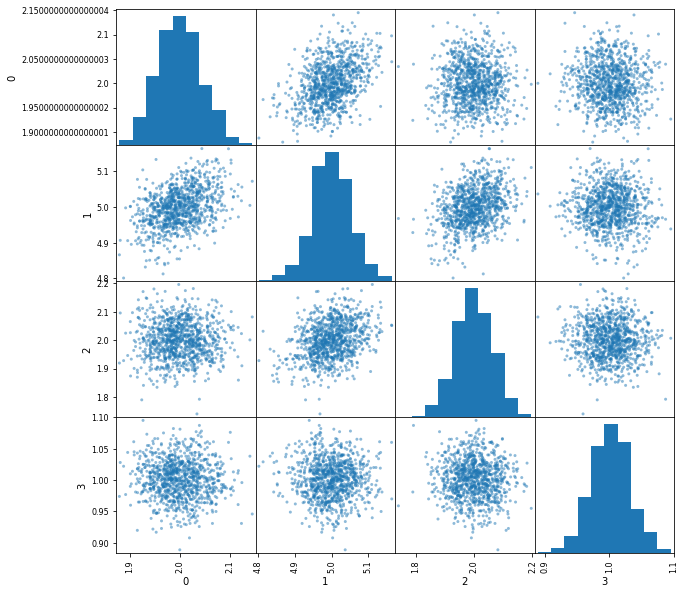

In [13]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.show()

## Teste de hipóteses para ($\mu$ multidimensional)

$$\begin{array}{l}H_0:{\mu}=\mu_0\mbox{ contra }\\H_1:\mu\neq\mu_0,\end{array}$$




In [14]:
df.mean()

0    1.999891
1    4.998930
2    1.999794
3    1.001302
dtype: float64

Teste se o vetor de médias pode ser considerado (2,5,2,1)^T 

In [15]:
# Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

from scipy.stats import f


In [16]:

def T2Hotelling(df, mu0, n, p):
    Xbarra=df.mean()
    S = df.cov()
    S_inv = np.linalg.inv(S)
    T2Hotelling = n*np.array(Xbarra-mu0).T.dot(S_inv).dot(np.array(Xbarra-mu0))
    qf = f.ppf(0.95, p , n-p, loc=0, scale=1)
    teste = T2Hotelling > (n-1) * p / (n-p) * qf
    pvalor = 1-f.cdf(T2Hotelling/((n-1) * p / (n-p) ), p, n-p)
    print('Rejeitamos H0') if teste else print('Não rejeitamos H0')
    print('Valor da estatística', T2Hotelling)
    print('valor p', pvalor)
    

In [17]:
n=len(df)
p=4
mu0 = [2,5,2,1]
T2Hotelling(df, mu0, n, p)

Não rejeitamos H0
Valor da estatística 2.2631865313113644
valor p 0.6887728134154127


In [18]:
mu0 = [3,5,2,1]
T2Hotelling(df, mu0, n, p)

Rejeitamos H0
Valor da estatística 624830.5851228771
valor p 1.1102230246251565e-16


In [19]:
mu0 = [2.001,5,2,1]
T2Hotelling(df, mu0, n, p)

Não rejeitamos H0
Valor da estatística 2.47523808427131
valor p 0.6505140121390409
